<a href="https://colab.research.google.com/github/IM07813/gaussian_process/blob/main/gaussian_process_using_gpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gpytorch torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.6/175.6 kB 8.1 MB/s eta 0:00:00


# Summation of Random Independent Values and Normal Distribution

One of the most important results in probability theory is that the sum of independent normal random variables is also normal. This means that if we have a collection of random variables $X_1, X_2, \dots, X_n$ that are normally distributed with means $\mu_1, \mu_2, \dots, \mu_n$ and variances $\sigma_1^2, \sigma_2^2, \dots, \sigma_n^2$, then their linear combination $Y = \sum_{i=1}^n c_i X_i$ is also normally distributed with mean $\mu_Y = \sum_{i=1}^n c_i \mu_i$ and variance $\sigma_Y^2 = \sum_{i=1}^n c_i^2 \sigma_i^2$.

This result can be proved using different methods, such as characteristic functions, convolutions, or geometric arguments. The basic idea is to show that the moment-generating function or the probability density function of $Y$ has the same form as that of a normal random variable, and then use the uniqueness property of these functions to identify the parameters of $Y$.

To illustrate this result, let us consider a simple example. Suppose we have two independent normal random variables $X_1 \sim N(2, 3)$ and $X_2 \sim N(1, 4)$. What is the distribution of $Y = 2X_1 + 3X_2$? Using the formula above, we can easily find that $Y \sim N(7, 48)$. This means that the sum of two independent normal random variables is normal, with its mean being the sum of the two means, and its variance being the sum of the two variances.

The significance of this result is that it allows us to approximate the distribution of many real-world phenomena that are influenced by many independent factors. For example, the height of a person can be modeled as the sum of many genetic and environmental factors, each of which can be assumed to be normally distributed. Similarly, the score of a student on a standardized test can be modeled as the sum of many questions, each of which can be assumed to be normally distributed. By using the properties of normal distribution, we can then calculate the probabilities and statistics of these phenomena more easily.


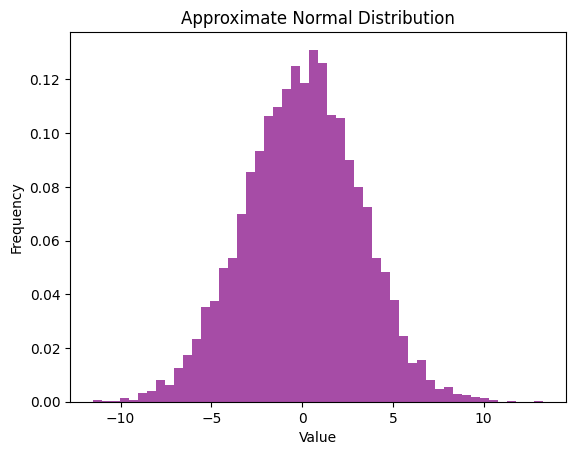

In [19]:
import torch
import matplotlib.pyplot as plt

def generate_approx_normal_distribution(size):
    # Generate random values and sum them together
    random_values = torch.randn(size, 10)
    summed_values = torch.sum(random_values, dim=1)

    # Plot the distribution
    plt.hist(summed_values.numpy(), bins=50, density=True, alpha=0.7, color='purple')
    plt.title('Approximate Normal Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Example usage:
sample_size = 10000
generate_approx_normal_distribution(sample_size)

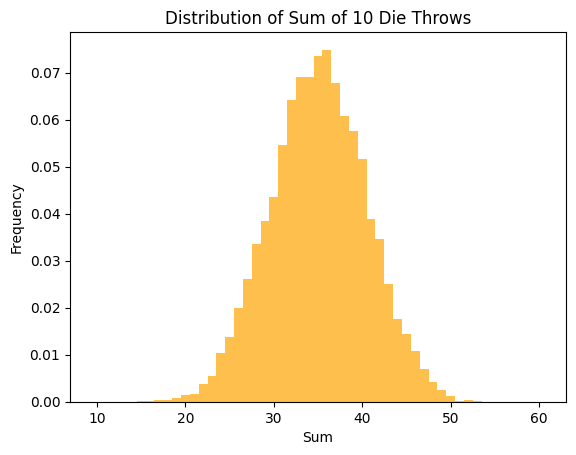

In [20]:
import torch
import matplotlib.pyplot as plt

def simulate_die_sum(num_throws, num_dice):
    # Simulate rolling a fair six-sided die multiple times
    outcomes = torch.randint(1, 7, (num_throws, num_dice))

    # Sum the outcomes along each row
    sums = torch.sum(outcomes, dim=1)

    # Plot the distribution
    plt.hist(sums.numpy(), bins=range(num_dice, 6*num_dice+2), density=True, align='left', alpha=0.7, color='orange')
    plt.title(f'Distribution of Sum of {num_dice} Die Throws')
    plt.xlabel('Sum')
    plt.ylabel('Frequency')
    plt.show()

# Example usage:
num_throws = 10000
num_dice_thrown = 10

simulate_die_sum(num_throws, num_dice_thrown)

# Gaussian Process Math

A Gaussian process is defined by a mean function $m(x)$ and a covariance function $k(x, x')$, such that for any finite set of input points $X = \{x_1, x_2, ..., x_n\}$, the corresponding function values $f(X) = \{f(x_1), f(x_2), ..., f(x_n)\}$ follow a multivariate normal distribution:

$$f(X) \sim \mathcal{N}(m(X), K(X, X))$$

where $m(X) = [m(x_1), m(x_2), ..., m(x_n)]^T$ is the mean vector and $K(X, X) = [k(x_i, x_j)]_{i,j=1}^n$ is the covariance matrix.

Given a set of training data $D = \{(x_i, y_i)\}_{i=1}^N$, where $y_i = f(x_i) + \epsilon_i$ and $\epsilon_i \sim \mathcal{N}(0, \sigma_n^2)$ is the noise term, we can use the properties of multivariate normal distributions to compute the posterior distribution over the function values at some test points $X_* = \{x_*^1, x_*^2, ..., x_*^m\}$:

$$f(X_*) | X_*, X, y \sim \mathcal{N}(\mu_*, \Sigma_*)$$

where

$$\mu_* = m(X_*) + K(X_*, X)K(X, X)^{-1}(y - m(X))$$

$$\Sigma_* = K(X_*, X_*) - K(X_*, X)K(X, X)^{-1}K(X, X_*)$$

The posterior mean $\mu_*$ gives us the prediction for the function values at the test points, and the posterior covariance $\Sigma_*$ gives us the uncertainty about the prediction.

The choice of the covariance function $k(x, x')$ determines the properties and smoothness of the function. A common choice is the squared exponential kernel, which is defined as:

$$k(x, x') = \sigma_f^2 \exp \left( - \frac{(x - x')^2}{2l^2} \right)$$

where $\sigma_f^2$ is the signal variance and $l$ is the length scale. The signal variance controls the overall amplitude of the function, and the length scale controls the smoothness of the function. The larger the length scale, the smoother the function.

The kernel parameters $\sigma_f^2$, $l$, and $\sigma_n^2$ can be learned from the data by maximizing the marginal likelihood, which is the probability of the observed data given the model:

$$p(y | X) = \int p(y | f, X) p(f | X) df$$

Since $p(y | f, X) = \mathcal{N}(f, \sigma_n^2 I)$ and $p(f | X) = \mathcal{N}(m(X), K(X, X))$, the marginal likelihood is also a Gaussian distribution:

$$p(y | X) = \mathcal{N}(y | m(X), K(X, X) + \sigma_n^2 I)$$

The log marginal likelihood is given by:

$$\log p(y | X) = -\frac{1}{2}(y - m(X))^T (K(X, X) + \sigma_n^2 I)^{-1} (y - m(X)) - \frac{1}{2} \log |K(X, X) + \sigma_n^2 I| - \frac{n}{2} \log 2 \pi$$

We can optimize this expression with respect to the kernel parameters using gradient-based methods.


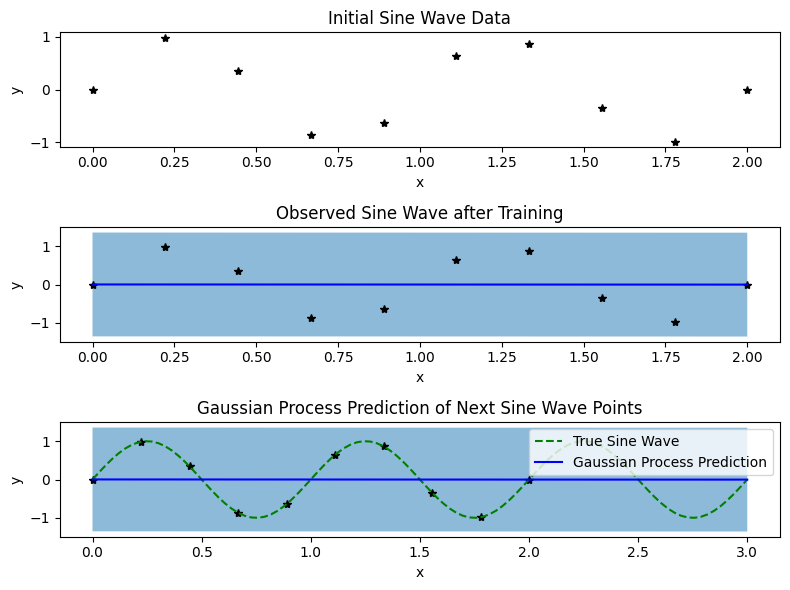

In [24]:
import torch
import gpytorch
import matplotlib.pyplot as plt

# Generating synthetic sine wave data
def generate_sine_wave(x):
    return torch.sin(x * (2 * 3.1416))

# Generating initial data
train_x = torch.linspace(0, 2, 10)
train_y = generate_sine_wave(train_x)

# Plotting the initial sine wave
plt.figure(figsize=(8, 6))  # Adjusted figure size
plt.subplot(3, 1, 1)  # Increased number of subplots
plt.plot(train_x.numpy(), train_y.numpy(), 'k*')
plt.title('Initial Sine Wave Data')
plt.xlabel('x')
plt.ylabel('y')

# Define the Gaussian process model
class GaussianProcessModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcessModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GaussianProcessModel(train_x, train_y, likelihood)

# Training the model
model.train()
likelihood.train()

# Using the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# Training for 100 iterations
for i in range(100):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Plotting the observed data after training
model.eval()
likelihood.eval()
plt.subplot(3, 1, 2)  # Increased number of subplots
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(train_x))
    lower, upper = observed_pred.confidence_region()
    plt.plot(train_x.numpy(), train_y.numpy(), 'k*')
    plt.plot(train_x.numpy(), observed_pred.mean.numpy(), 'b')
    plt.fill_between(train_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    plt.title('Observed Sine Wave after Training')
    plt.xlabel('x')
    plt.ylabel('y')

# Generate test points for predicting the next points
test_x = torch.linspace(0, 3, 100)
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(test_x))

# Plotting the Gaussian process prediction for the next points
plt.subplot(3, 1, 3)  # Increased number of subplots
lower, upper = observed_pred.confidence_region()
plt.plot(train_x.numpy(), train_y.numpy(), 'k*')
plt.plot(test_x.numpy(), generate_sine_wave(test_x).numpy(), 'g--', label='True Sine Wave')
plt.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b', label='Gaussian Process Prediction')
plt.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
plt.title('Gaussian Process Prediction of Next Sine Wave Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

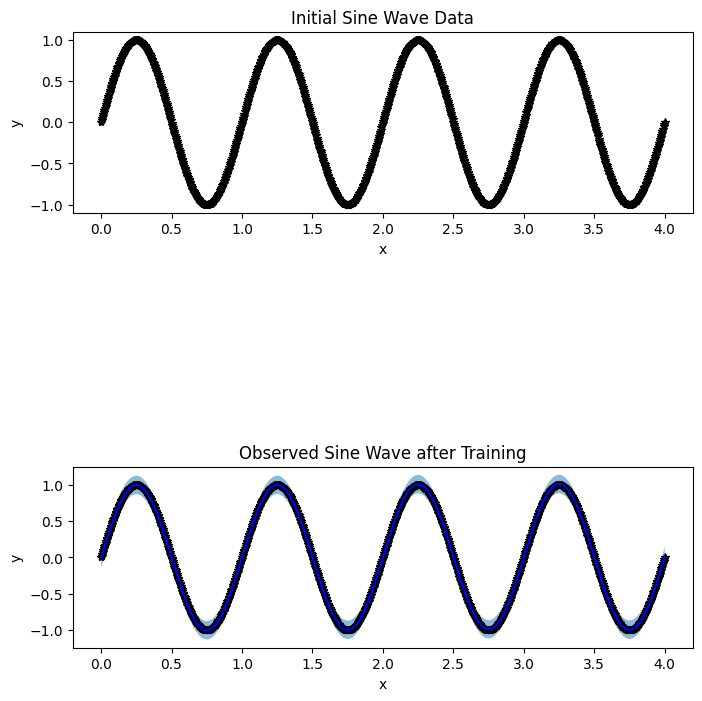

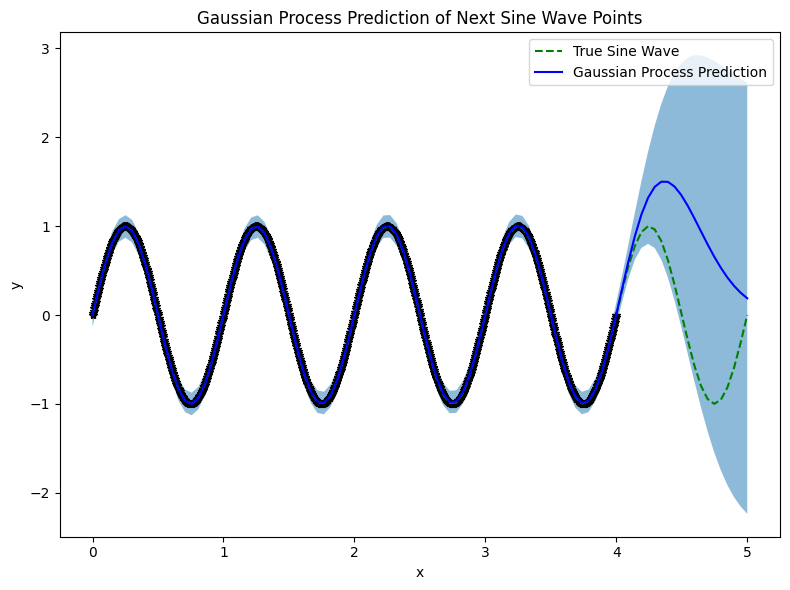

In [29]:
import torch
import gpytorch
import matplotlib.pyplot as plt

# Generating synthetic sine wave data
def generate_sine_wave(x):
    return torch.sin(x * (2 * 3.1416))

# Generating a larger dataset
train_x = torch.linspace(0, 4, 1000)
train_y = generate_sine_wave(train_x)

# Plotting the initial sine wave
plt.figure(figsize=(8, 8))  # Adjusted figure size
plt.subplot(3, 1, 1)
plt.plot(train_x.numpy(), train_y.numpy(), 'k*')
plt.title('Initial Sine Wave Data')
plt.xlabel('x')
plt.ylabel('y')

# Define the Gaussian process model
class GaussianProcessModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcessModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GaussianProcessModel(train_x, train_y, likelihood)

# Training the model
model.train()
likelihood.train()

# Using the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# Training for 500 iterations
for i in range(500):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Plotting the observed data after training
model.eval()
likelihood.eval()
plt.subplot(3, 1, 3)  # Adjusted subplot index
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(train_x))
    lower, upper = observed_pred.confidence_region()
    plt.plot(train_x.numpy(), train_y.numpy(), 'k*')
    plt.plot(train_x.numpy(), observed_pred.mean.numpy(), 'b')
    plt.fill_between(train_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    plt.title('Observed Sine Wave after Training')
    plt.xlabel('x')
    plt.ylabel('y')

# Generate test points for predicting the next points
test_x = torch.linspace(0, 5, 100)
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(test_x))

# Plotting the Gaussian process prediction for the next points
plt.figure(figsize=(8, 6))  # Adjusted figure size
lower, upper = observed_pred.confidence_region()
plt.plot(train_x.numpy(), train_y.numpy(), 'k*')
plt.plot(test_x.numpy(), generate_sine_wave(test_x).numpy(), 'g--', label='True Sine Wave')
plt.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b', label='Gaussian Process Prediction')
plt.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
plt.title('Gaussian Process Prediction of Next Sine Wave Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

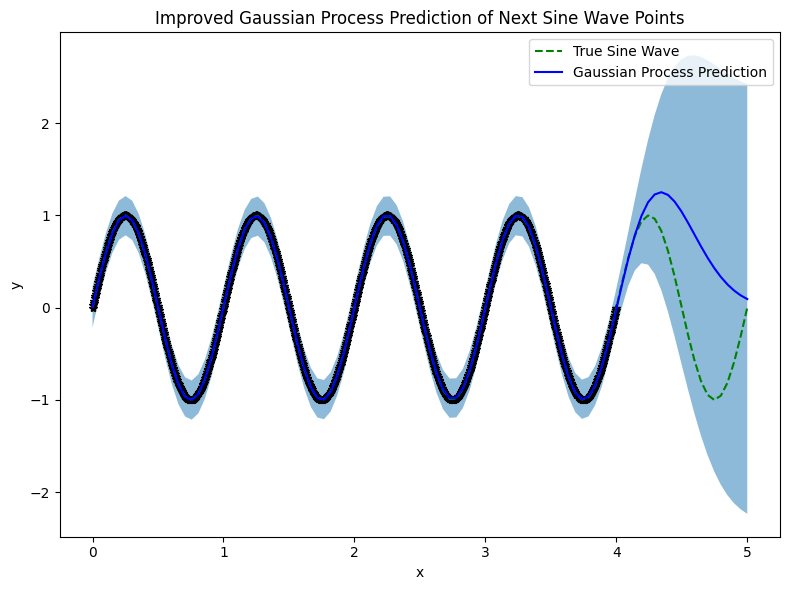

In [31]:
import torch
import gpytorch
import matplotlib.pyplot as plt

# Generating synthetic sine wave data
def generate_sine_wave(x):
    return torch.sin(x * (2 * 3.1416))

# Generating a larger dataset
train_x = torch.linspace(0, 4, 1000)
train_y = generate_sine_wave(train_x)

# Define the Gaussian process model
class GaussianProcessModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcessModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GaussianProcessModel(train_x, train_y, likelihood)

# Training the model
model.train()
likelihood.train()

# Using the Adam optimizer with a tuned learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# ...

# Training for 800 iterations
for i in range(800):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Switch model and likelihood to evaluation mode
model.eval()
likelihood.eval()

# Generate test points for predicting the next points
test_x = torch.linspace(0, 5, 100)
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(test_x))

# ...

# Plotting the Gaussian process prediction for the next points
plt.figure(figsize=(8, 6))
lower, upper = observed_pred.confidence_region()
plt.plot(train_x.numpy(), train_y.numpy(), 'k*')
plt.plot(test_x.numpy(), generate_sine_wave(test_x).numpy(), 'g--', label='True Sine Wave')
plt.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b', label='Gaussian Process Prediction')
plt.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
plt.title('Improved Gaussian Process Prediction of Next Sine Wave Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/gpytorch/distributions/multivariate_normal.py:319: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  warnings.warn(


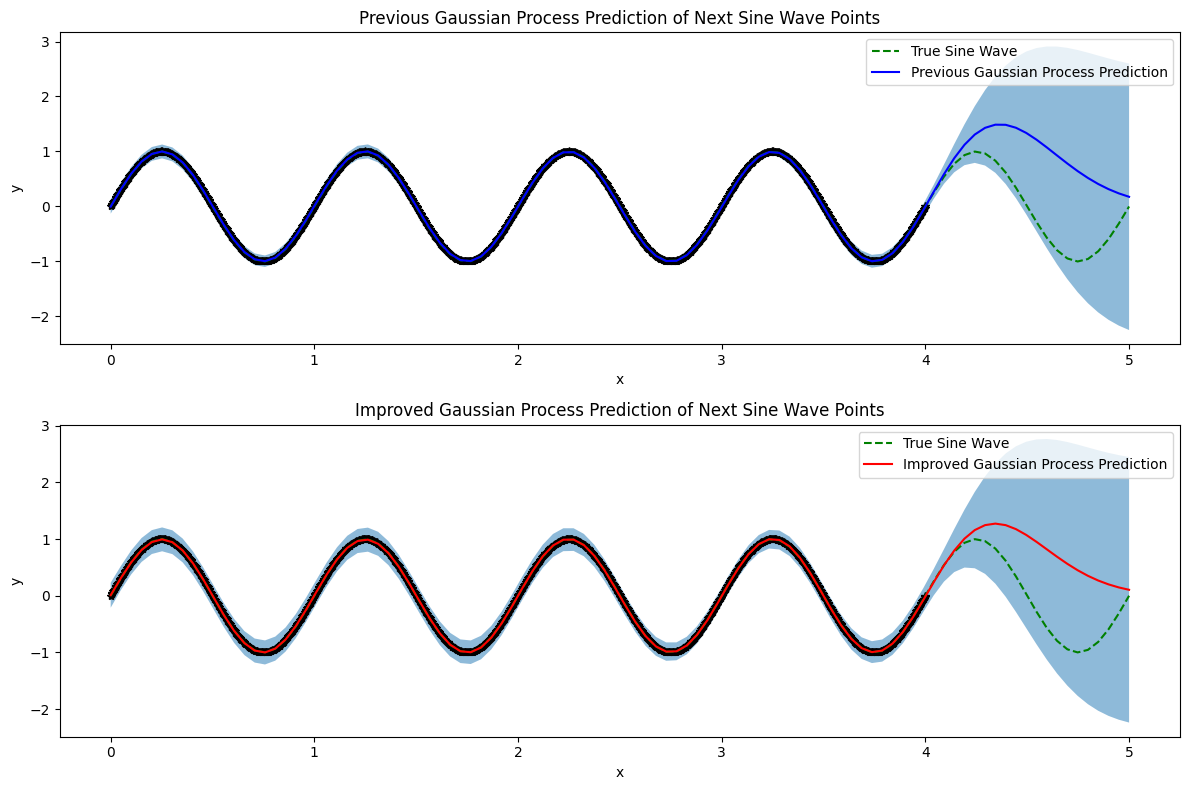

In [32]:
import torch
import gpytorch
import matplotlib.pyplot as plt

# Generating synthetic sine wave data
def generate_sine_wave(x):
    return torch.sin(x * (2 * 3.1416))

# Generating a larger dataset
train_x = torch.linspace(0, 4, 1000)
train_y = generate_sine_wave(train_x)

# Define the Gaussian process model
class GaussianProcessModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcessModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize likelihood and model
likelihood_prev = gpytorch.likelihoods.GaussianLikelihood()
model_prev = GaussianProcessModel(train_x, train_y, likelihood_prev)

# Training the previous model
model_prev.train()
likelihood_prev.train()

optimizer_prev = torch.optim.Adam(model_prev.parameters(), lr=0.01)
mll_prev = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood_prev, model_prev)

for i in range(500):
    optimizer_prev.zero_grad()
    output_prev = model_prev(train_x)
    loss_prev = -mll_prev(output_prev, train_y)
    loss_prev.backward()
    optimizer_prev.step()

# Initialize and train the improved model
likelihood_improved = gpytorch.likelihoods.GaussianLikelihood()
model_improved = GaussianProcessModel(train_x, train_y, likelihood_improved)

model_improved.train()
likelihood_improved.train()

optimizer_improved = torch.optim.Adam(model_improved.parameters(), lr=0.005)
mll_improved = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood_improved, model_improved)

for i in range(800):
    optimizer_improved.zero_grad()
    output_improved = model_improved(train_x)
    loss_improved = -mll_improved(output_improved, train_y)
    loss_improved.backward()
    optimizer_improved.step()

# Switch models and likelihoods to evaluation mode
model_prev.eval()
likelihood_prev.eval()

model_improved.eval()
likelihood_improved.eval()

# Generate test points for predicting the next points
test_x = torch.linspace(0, 5, 100)
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred_prev = likelihood_prev(model_prev(test_x))
    observed_pred_improved = likelihood_improved(model_improved(test_x))

# Plotting the Gaussian process predictions for comparison
plt.figure(figsize=(12, 8))

# Previous Gaussian Process Prediction
plt.subplot(2, 1, 1)
lower_prev, upper_prev = observed_pred_prev.confidence_region()
plt.plot(train_x.numpy(), train_y.numpy(), 'k*')
plt.plot(test_x.numpy(), generate_sine_wave(test_x).numpy(), 'g--', label='True Sine Wave')
plt.plot(test_x.numpy(), observed_pred_prev.mean.numpy(), 'b', label='Previous Gaussian Process Prediction')
plt.fill_between(test_x.numpy(), lower_prev.numpy(), upper_prev.numpy(), alpha=0.5)
plt.title('Previous Gaussian Process Prediction of Next Sine Wave Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Improved Gaussian Process Prediction
plt.subplot(2, 1, 2)
lower_improved, upper_improved = observed_pred_improved.confidence_region()
plt.plot(train_x.numpy(), train_y.numpy(), 'k*')
plt.plot(test_x.numpy(), generate_sine_wave(test_x).numpy(), 'g--', label='True Sine Wave')
plt.plot(test_x.numpy(), observed_pred_improved.mean.numpy(), 'r', label='Improved Gaussian Process Prediction')
plt.fill_between(test_x.numpy(), lower_improved.numpy(), upper_improved.numpy(), alpha=0.5)
plt.title('Improved Gaussian Process Prediction of Next Sine Wave Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()